In [2]:
# Install required libraries
!pip install pandas matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [9]:
# Create directories if they don't exist
try:
    os.makedirs('csv_files', exist_ok=True)
    os.makedirs('outputs', exist_ok=True)
except OSError as e:
    print(f"Error creating directories: {e}")

# --- Step 1: Data Ingestion and Preprocessing ---

print("Starting data ingestion and preprocessing...")

sentiment_df = pd.read_csv('csv_files/fear_greed_index.csv')
trader_df = pd.read_csv('csv_files/historical_data.csv')
print("Datasets loaded successfully.")

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], dayfirst=True, format='mixed')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, format='mixed')

trader_df['Date'] = trader_df['Timestamp IST'].dt.date
sentiment_df['Date'] = sentiment_df['date'].dt.date




Starting data ingestion and preprocessing...
Datasets loaded successfully.


In [10]:
# --- Step 2: Merge Datasets ---

merged_df = pd.merge(trader_df, sentiment_df, on='Date', how='left')
merged_df = merged_df.drop('Date', axis=1)

print("Datasets merged successfully.")
print("\nMerged Data Summary:")
print(merged_df.head())
print("\nMissing values in merged data:")
print(merged_df.isnull().sum())


Datasets merged successfully.

Merged Data Summary:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                           


Starting Exploratory Data Analysis...

Summary statistics of key numerical columns:
          Closed PnL      Size USD
count  211224.000000  2.112240e+05
mean       48.749001  5.639451e+03
std       919.164828  3.657514e+04
min   -117990.104100  0.000000e+00
25%         0.000000  1.937900e+02
50%         0.000000  5.970450e+02
75%         5.792797  2.058960e+03
max    135329.090100  3.921431e+06


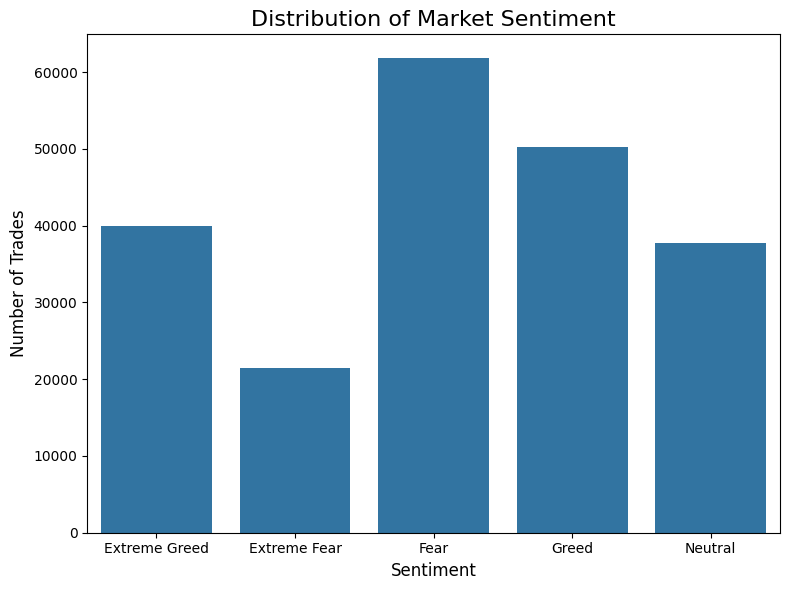

/tmp/ipython-input-2240943521.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='viridis')


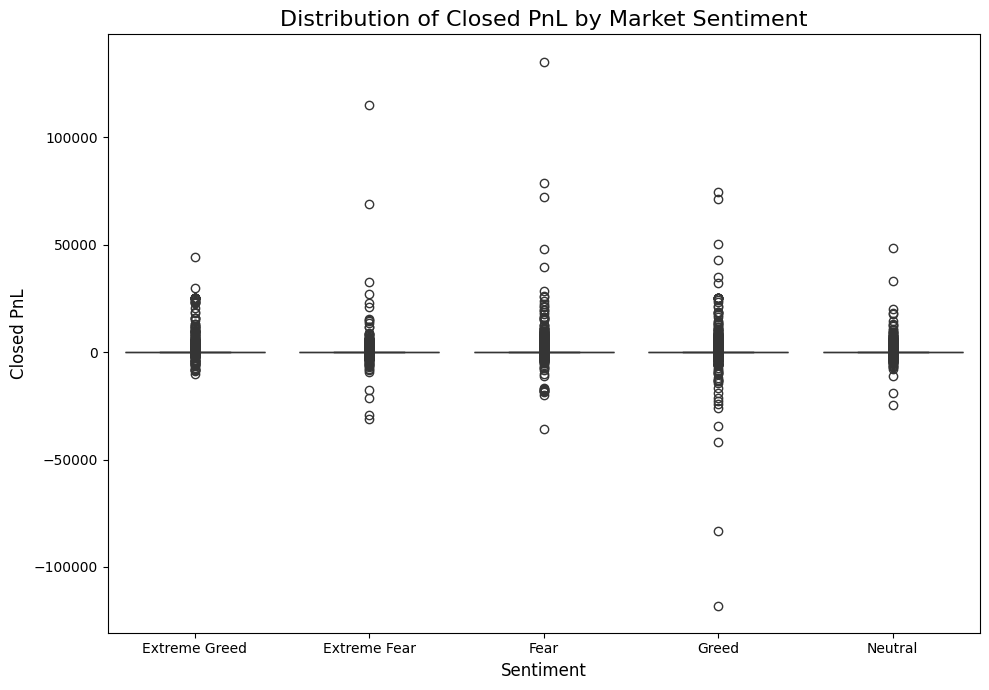

/tmp/ipython-input-2240943521.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette='coolwarm')


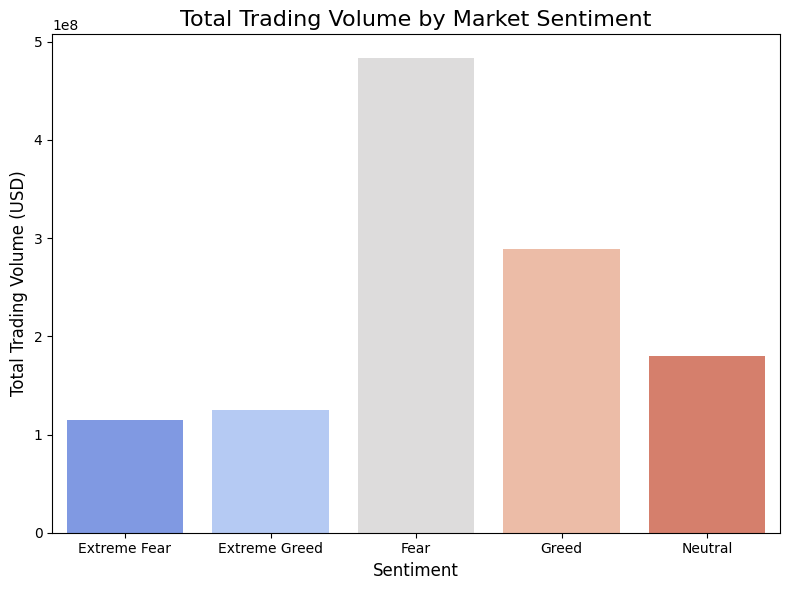

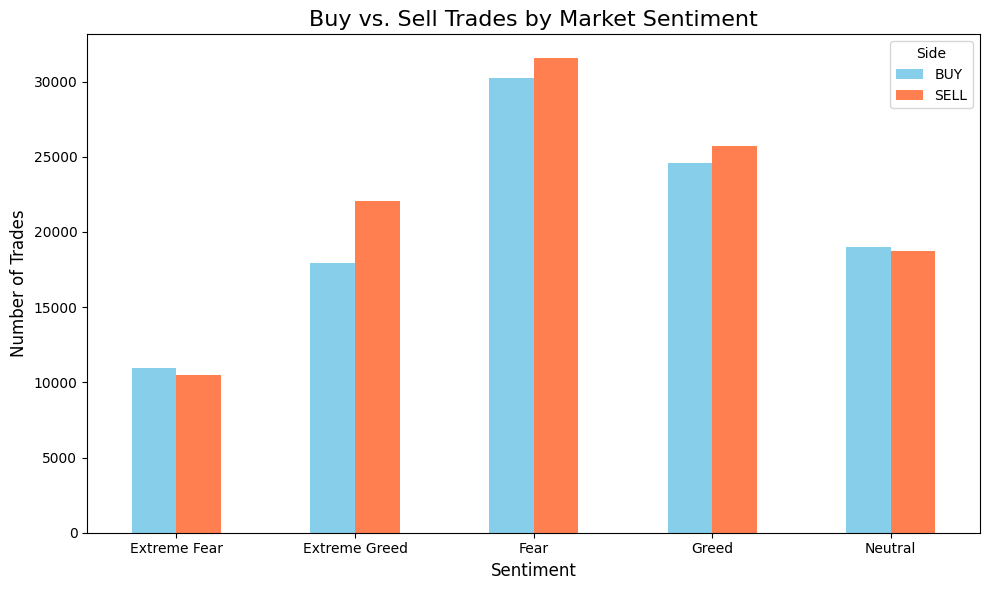


EDA complete. Cleaned and merged data saved to 'csv_files/merged_data.csv'.
All plots saved to the 'outputs/' directory.


In [11]:
# --- Step 3: Exploratory Data Analysis (EDA) ---

print("\nStarting Exploratory Data Analysis...")

# 3.1. Summary Statistics
print("\nSummary statistics of key numerical columns:")
print(merged_df[['Closed PnL', 'Size USD']].describe())

# 3.2. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='classification')
plt.title('Distribution of Market Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/sentiment_distribution.png')
plt.show()

# 3.3. Trader Profitability (PnL) Analysis across sentiments
plt.figure(figsize=(10, 7))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='viridis')
plt.title('Distribution of Closed PnL by Market Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Closed PnL', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/pnl_by_sentiment.png')
plt.show()


# 3.4. Trading Volume Analysis
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette='coolwarm')
plt.title('Total Trading Volume by Market Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Total Trading Volume (USD)', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()

# 3.5. Buy vs. Sell Trade Ratio
buy_sell_counts = merged_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)
buy_sell_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'coral'])
plt.title('Buy vs. Sell Trades by Market Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('outputs/buy_sell_ratio.png')
plt.show()

# Save the merged dataframe to a new CSV for the next notebook
merged_df.to_csv('csv_files/merged_data.csv', index=False)
print("\nEDA complete. Cleaned and merged data saved to 'csv_files/merged_data.csv'.")
print("All plots saved to the 'outputs/' directory.")


In [17]:
# --- Part 4: Advanced Analysis (from notebook_2.ipynb) ---
#----Step 4.1-----------------------------------------------
# Import necessary libraries for this section
from scipy import stats

print("\nStarting advanced analysis...")

# Load the merged data from the previous step
try:
    merged_df = pd.read_csv('csv_files/merged_data.csv')
    print("Cleaned and merged data loaded successfully for advanced analysis.")
except FileNotFoundError:
    print("Error: 'merged_data.csv' not found. Please ensure you have run the data cleaning and EDA section first.")
    raise SystemExit("Exiting due to missing file.")



Starting advanced analysis...
Cleaned and merged data loaded successfully for advanced analysis.


In [14]:
# --- Step 4.2: Identify Top and Bottom Performers ---

print("\nAnalyzing top and bottom performers...")
# Group by account and calculate total PnL
trader_performance = merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False)

# Identify top 5% of performers
top_5_percent = int(len(trader_performance) * 0.05)
top_performers = trader_performance.head(top_5_percent)
print(f"Top {top_5_percent} performers (by total PnL):\n{top_performers}")

# Identify bottom 5% of performers
bottom_performers = trader_performance.tail(top_5_percent)
print(f"\nBottom {top_5_percent} performers (by total PnL):\n{bottom_performers}")

# Analyze their behavior during 'Fear' vs 'Greed'
top_performer_data = merged_df[merged_df['Account'].isin(top_performers.index)]
bottom_performer_data = merged_df[merged_df['Account'].isin(bottom_performers.index)]

print("\nBehavioral analysis of top vs. bottom performers:")
print(f"\nAverage PnL for top performers by sentiment:")
print(top_performer_data.groupby('classification')['Closed PnL'].mean())
print(f"\nAverage PnL for bottom performers by sentiment:")
print(bottom_performer_data.groupby('classification')['Closed PnL'].mean())


Analyzing top and bottom performers...
Top 1 performers (by total PnL):
Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
Name: Closed PnL, dtype: float64

Bottom 1 performers (by total PnL):
Account
0x8170715b3b381dffb7062c0298972d4727a0a63b   -167621.124781
Name: Closed PnL, dtype: float64

Behavioral analysis of top vs. bottom performers:

Average PnL for top performers by sentiment:
classification
Extreme Fear      12.915976
Extreme Greed    672.735763
Fear              31.003381
Greed             90.687423
Neutral          116.086038
Name: Closed PnL, dtype: float64

Average PnL for bottom performers by sentiment:
classification
Extreme Fear      79.959076
Extreme Greed   -195.264421
Fear              86.700707
Greed           -217.847488
Neutral           50.328183
Name: Closed PnL, dtype: float64



Performing correlation analysis...


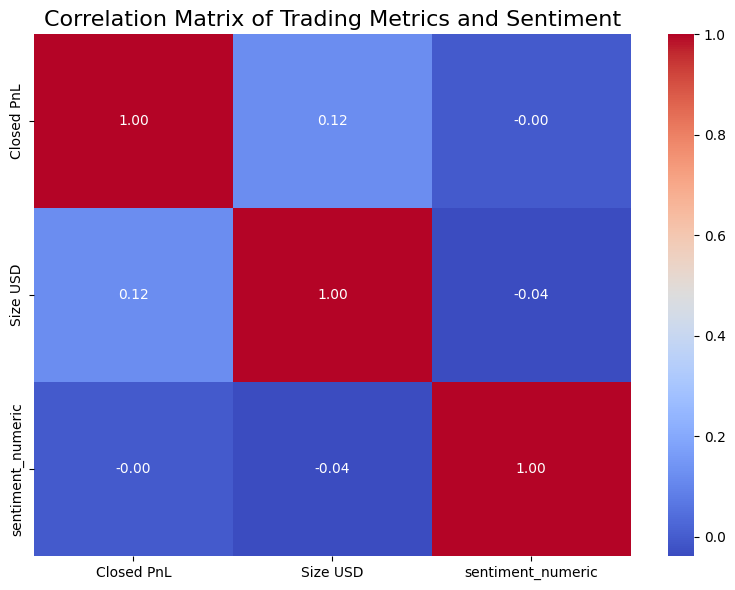

Correlation matrix plot saved to 'outputs/'.


In [15]:
# --- Step 4.3: Correlation Analysis ---

print("\nPerforming correlation analysis...")
# Let's map 'Fear' to 0 and 'Greed' to 1.
merged_df['sentiment_numeric'] = merged_df['classification'].apply(lambda x: 0 if x == 'Fear' else 1)

# Select numerical columns for correlation matrix
corr_df = merged_df[['Closed PnL', 'Size USD', 'sentiment_numeric']]
correlation_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Trading Metrics and Sentiment', fontsize=16)
plt.tight_layout()
plt.savefig('outputs/correlation_matrix.png')
plt.show()
print("Correlation matrix plot saved to 'outputs/'.")

In [16]:
# --- Step 4: Hypothesis Testing (e.g., T-test) ---

print("\nPerforming hypothesis testing...")
# Hypothesis: The mean PnL for 'Greed' periods is significantly different from 'Fear' periods.
# We'll use an independent samples t-test.

fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL']
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL']

# Check for variance equality (Levene's test)
_, p_value_levene = stats.levene(fear_pnl, greed_pnl)
equal_var = p_value_levene > 0.05

# Perform the t-test
t_stat, p_value_ttest = stats.ttest_ind(fear_pnl, greed_pnl, equal_var=equal_var)

print("\nHypothesis Test Results:")
print(f"Mean PnL during Fear periods: {fear_pnl.mean():.2f}")
print(f"Mean PnL during Greed periods: {greed_pnl.mean():.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value_ttest:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value_ttest < alpha:
    print(f"\nSince the p-value ({p_value_ttest:.4f}) is less than the significance level (α = {alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in mean PnL between Fear and Greed periods.")
else:
    print(f"\nSince the p-value ({p_value_ttest:.4f}) is greater than the significance level (α = {alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in mean PnL between Fear and Greed periods.")

print("\nAdvanced analysis complete. All plots saved to the 'outputs/' directory.")



Performing hypothesis testing...

Hypothesis Test Results:
Mean PnL during Fear periods: 54.29
Mean PnL during Greed periods: 42.74
T-statistic: 1.88
P-value: 0.0595

Since the p-value (0.0595) is greater than the significance level (α = 0.05), we fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference in mean PnL between Fear and Greed periods.

Advanced analysis complete. All plots saved to the 'outputs/' directory.
